In [20]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
mlp.style.use("seaborn")
import statsmodels
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [21]:
'''The Frist Proposal'''

'The Frist Proposal'

In [22]:
df = pd.read_excel('../data/index_data.xlsx')
df = df.fillna(np.nan)
df

,Date,P,D,E,CPI,Fraction,Rate GS10,Real Price,Real Dividend,Real Total ReturnPrice,Real Earnings,Real TR Scaled Earnings,CAPE,TR CAPE,Excess CAPE Yield,Bond Returns,Real Bond Returns,Real Stock Return,Real Bond Return,Real Excess Returns
0,1871.01,4.440000,0.260000,0.40,12.464061,1871.041667,5.320000,97.250271,5.694836,9.725027e+01,8.761286,8.761286,NaN,NaN,NaN,1.004177,1.000000,0.130609,0.092504,0.038106
1,1871.02,4.500000,0.260000,0.40,12.844641,1871.125000,5.323333,95.644049,5.526101,9.610456e+01,8.501693,8.542627,NaN,NaN,NaN,1.004180,0.974424,0.130858,0.094635,0.036224
2,1871.03,4.610000,0.260000,0.40,13.034972,1871.208333,5.326667,96.551327,5.445411,9.747217e+01,8.377555,8.457455,NaN,NaN,NaN,1.004183,0.964209,0.130951,0.096186,0.034765
3,1871.04,4.740000,0.260000,0.40,12.559226,1871.291667,5.330000,103.034548,5.651684,1.044927e+02,8.694899,8.817949,NaN,NaN,NaN,1.004185,1.004919,0.122056,0.090972,0.031084
4,1871.05,4.860000,0.260000,0.40,12.273812,1871.375000,5.333333,108.099637,5.783108,1.101182e+02,8.897089,9.063227,NaN,NaN,NaN,1.004188,1.032591,0.122638,0.089488,0.033150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,2021.05,4167.849500,57.787824,148.56,269.195000,2021.375000,1.620000,4226.807396,58.605283,2.685353e+06,150.661512,95717.473520,36.552152,40.014713,0.028818,1.010550,52.255601,NaN,NaN,NaN
1805,2021.06,4238.489545,57.865042,158.74,271.696000,2021.458333,1.520000,4258.878899,58.143403,2.708807e+06,159.503623,101450.284227,36.696312,40.148114,0.030762,1.019847,52.320805,NaN,NaN,NaN
1806,2021.07,4363.712857,NaN,NaN,273.003000,2021.541667,1.320000,4363.712857,NaN,2.775485e+06,NaN,NaN,37.443491,40.891936,0.032617,1.004823,53.103769,NaN,NaN,NaN
1807,2021.08,4454.206364,NaN,NaN,273.656500,2021.625000,1.280000,4443.569584,NaN,2.826277e+06,NaN,NaN,38.090426,41.567547,0.032526,1.000136,53.232483,NaN,NaN,NaN


In [23]:
'''calculate new EPS and CAPE'''
new_eps = []
weight = []
for i in range(10):
    weight.extend([i+1] * 12)
total_weight = sum(weight)
weight = np.array(weight)
for date in range(len(df)):
    if date < 120:
        new_eps.append(np.nan)
    else:
        hist_eps = np.array(df['Real Earnings'][date-120:date])
        new_eps.append(np.nansum(weight * hist_eps) / total_weight)
df['new_eps'] = pd.Series(new_eps)
df['new_CAPE'] = df['Real Price'] / df['new_eps']
df

,Date,P,D,E,CPI,Fraction,Rate GS10,Real Price,Real Dividend,Real Total ReturnPrice,...,CAPE,TR CAPE,Excess CAPE Yield,Bond Returns,Real Bond Returns,Real Stock Return,Real Bond Return,Real Excess Returns,new_eps,new_CAPE
0,1871.01,4.440000,0.260000,0.40,12.464061,1871.041667,5.320000,97.250271,5.694836,9.725027e+01,...,NaN,NaN,NaN,1.004177,1.000000,0.130609,0.092504,0.038106,NaN,NaN
1,1871.02,4.500000,0.260000,0.40,12.844641,1871.125000,5.323333,95.644049,5.526101,9.610456e+01,...,NaN,NaN,NaN,1.004180,0.974424,0.130858,0.094635,0.036224,NaN,NaN
2,1871.03,4.610000,0.260000,0.40,13.034972,1871.208333,5.326667,96.551327,5.445411,9.747217e+01,...,NaN,NaN,NaN,1.004183,0.964209,0.130951,0.096186,0.034765,NaN,NaN
3,1871.04,4.740000,0.260000,0.40,12.559226,1871.291667,5.330000,103.034548,5.651684,1.044927e+02,...,NaN,NaN,NaN,1.004185,1.004919,0.122056,0.090972,0.031084,NaN,NaN
4,1871.05,4.860000,0.260000,0.40,12.273812,1871.375000,5.333333,108.099637,5.783108,1.101182e+02,...,NaN,NaN,NaN,1.004188,1.032591,0.122638,0.089488,0.033150,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,2021.05,4167.849500,57.787824,148.56,269.195000,2021.375000,1.620000,4226.807396,58.605283,2.685353e+06,...,36.552152,40.014713,0.028818,1.010550,52.255601,NaN,NaN,NaN,119.801653,35.281712
1805,2021.06,4238.489545,57.865042,158.74,271.696000,2021.458333,1.520000,4258.878899,58.143403,2.708807e+06,...,36.696312,40.148114,0.030762,1.019847,52.320805,NaN,NaN,NaN,120.360746,35.384285
1806,2021.07,4363.712857,NaN,NaN,273.003000,2021.541667,1.320000,4363.712857,NaN,2.775485e+06,...,37.443491,40.891936,0.032617,1.004823,53.103769,NaN,NaN,NaN,121.057167,36.046712
1807,2021.08,4454.206364,NaN,NaN,273.656500,2021.625000,1.280000,4443.569584,NaN,2.826277e+06,...,38.090426,41.567547,0.032526,1.000136,53.232483,NaN,NaN,NaN,119.329831,37.237709


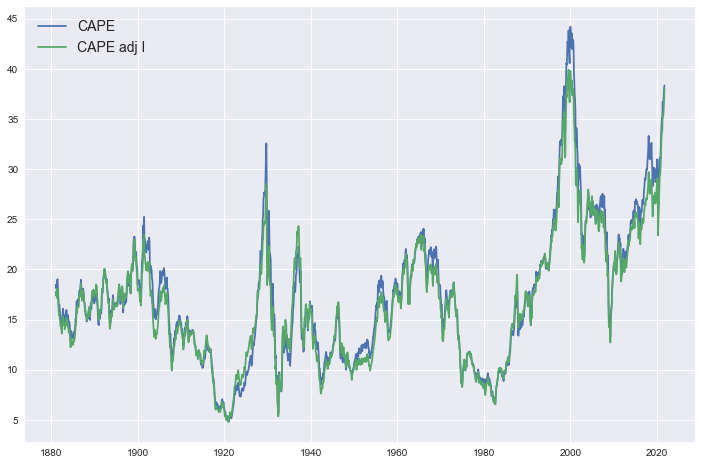

In [24]:
df.index = pd.date_range('1871-01', '2021-10', freq = 'M')
plt.figure(figsize = [12, 8])
plt.plot(df[['CAPE', 'new_CAPE']], label = ['CAPE', 'CAPE adj I'])
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

In [25]:
# total period, old CAPE
sm_df = df[['Fraction', 'Real Stock Return', 'CAPE', 'new_CAPE']]
sm_df.dropna(inplace = True)
y = sm_df['Real Stock Return']
X = sm.add_constant(np.log(sm_df['CAPE']))
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Real Stock Return   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     707.9
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          5.29e-129
Time:                        05:04:04   Log-Likelihood:                 2710.8
No. Observations:                1568   AIC:                            -5418.
Df Residuals:                    1566   BIC:                            -5407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2650      0.008     35.031      0.0

In [26]:
# total period, new CAPE
y = sm_df['Real Stock Return']
X = sm.add_constant(np.log(sm_df['new_CAPE']))
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Real Stock Return   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     685.0
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          1.49e-125
Time:                        05:04:04   Log-Likelihood:                 2702.9
No. Observations:                1568   AIC:                            -5402.
Df Residuals:                    1566   BIC:                            -5391.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2692      0.008     34.303      0.0

In [27]:
# before 2006, old CAPE
sm_df_before = sm_df[sm_df.Fraction <= 2007]
y = sm_df_before['Real Stock Return']
X = sm.add_constant(np.log(sm_df_before['CAPE']))
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Real Stock Return   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     801.3
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          9.09e-142
Time:                        05:04:04   Log-Likelihood:                 2646.5
No. Observations:                1512   AIC:                            -5289.
Df Residuals:                    1510   BIC:                            -5278.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2746      0.008     36.618      0.0

In [28]:
# before 2006, new CAPE
y = sm_df_before['Real Stock Return']
X = sm.add_constant(np.log(sm_df_before['new_CAPE']))
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Real Stock Return   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     772.3
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          1.25e-137
Time:                        05:04:04   Log-Likelihood:                 2636.9
No. Observations:                1512   AIC:                            -5270.
Df Residuals:                    1510   BIC:                            -5259.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2788      0.008     35.808      0.0

In [29]:
# after 2007, old CAPE
sm_df_after = sm_df[sm_df.Fraction > 2007]
y = sm_df_after['Real Stock Return']
X = sm.add_constant(np.log(sm_df_after['CAPE']))
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Real Stock Return   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     88.74
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           5.43e-13
Time:                        05:04:04   Log-Likelihood:                 148.66
No. Observations:                  56   AIC:                            -293.3
Df Residuals:                      54   BIC:                            -289.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4565      0.038     12.034      0.0

In [30]:
# after 2007, new CAPE
y = sm_df_after['Real Stock Return']
X = sm.add_constant(np.log(sm_df_after['new_CAPE']))
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Real Stock Return   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     60.19
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           2.42e-10
Time:                        05:04:04   Log-Likelihood:                 142.42
No. Observations:                  56   AIC:                            -280.8
Df Residuals:                      54   BIC:                            -276.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4383      0.044     10.030      0.0

In [31]:
'''The Second Proposal'''

'The Second Proposal'

In [32]:
'''this section derives all SPX constituents, original data (.xlsx) are from Bloomberg'''

qtrs = [' Mar', ' Jun', ' Sep', ' Dec']
tic_qtr = {}

names_1 = []
for year in range(1990, 2001):
    for qtr in qtrs:
        names_1.append(str(year) + qtr)

names_2 = []
for year in range(2001, 2012):
    for qtr in qtrs:
        names_2.append(str(year) + qtr)

for name in names_1:
    df = pd.read_excel('../data/index_SPX 1990-2000.xlsx', sheet_name = name)
    tic_qtr[name] = np.array(df['Ticker'].apply(lambda x: x.split(' ')[0]))
for name in names_2:
    df = pd.read_excel('../data/index_SPX 2000-2011.xlsx', sheet_name = name)
    tic_qtr[name] = np.array(df['Ticker'].apply(lambda x: x.split(' ')[0]))

In [33]:
'''this section calculates modified CAPE ratio, data (.csv) is from WRDS'''
df = pd.read_csv('../data/index_individual_dat.csv')

rolling_EPS = {}
real_P = {}
qtr_str_to_num = {'Mar': 3, 'Jun': 6, 'Sep': 9, 'Dec': 12}

for qtr in tic_qtr:
    this_df = df[df['tic'].isin(tic_qtr[qtr])]
    comp_df = pd.DataFrame((this_df.groupby('datacqtr')['ibq'].sum() \
        - this_df.groupby('datacqtr')['dvpy'].sum()).rename('EARN'))
    comp_df['SHOUT'] = this_df.groupby('datacqtr')['cshoq'].sum()
    year = int(qtr.split(' ')[0])
    fqtr = qtr_str_to_num[qtr.split(' ')[1]]
    comp_df['datadate'] = comp_df.index
    comp_df['datadate'] = comp_df['datadate'].apply(lambda x: int(x.split('Q')[0]) * 100 \
                                                    + int(x.split('Q')[1]) * 3)
    datadate = year * 100 + fqtr
    comp_df = comp_df[comp_df.datadate <= datadate]
    comp_df = comp_df[-40:]
            
    # CPI adjustment
    cpi = pd.read_excel('../data/index_CPI.xlsx')
    cpi['datadate'] = cpi['Year'] * 100 + cpi['Month']
    comp_df = pd.merge(comp_df, cpi, 
                       left_on = 'datadate', right_on = 'datadate', how = 'left')
    comp_df['real_EARN'] = comp_df['EARN'] * cpi['CPI'][len(cpi)-1] / comp_df['CPI']
    comp_df['real_P'] = comp_df['P'] * cpi['CPI'][len(cpi)-1] / comp_df['CPI']
    
    # add to output
    rolling_EPS[comp_df['datadate'][len(comp_df)-1]] = comp_df['real_EARN'].mean()
    real_P[comp_df['datadate'][len(comp_df)-1]] = comp_df['real_P'][len(comp_df)-1] * \
        comp_df['SHOUT'][len(comp_df)-1]

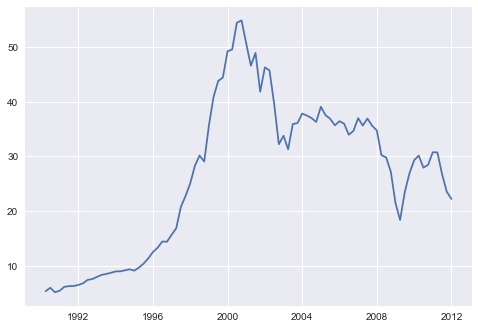

In [34]:
'''this section calculates the new CAPE'''
import matplotlib.pyplot as plt
CAPE = []
for year in real_P:
    CAPE.append(real_P[year] / rolling_EPS[year] / 100)
CAPE = pd.DataFrame(CAPE, index = pd.date_range('1990-03', '2012-01', freq = 'Q'))
CAPE.columns = ['new_CAPE']
plt.plot(CAPE)

In [35]:
'''regression'''
regression = pd.read_excel('../data/index_Regression.xlsx')
regression['datadate'] = regression['Year'] * 100 + regression['Month']
CAPE['datadate'] = CAPE.index.year * 100 + CAPE.index.month
CAPE = pd.merge(CAPE, regression, left_on = 'datadate', right_on = 'datadate', how = 'left')
CAPE.dropna(inplace = True)

# old CAPE
y = CAPE['Ret']
X = sm.add_constant(np.log(CAPE[['CAPE']]))
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Ret   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     605.6
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           3.66e-40
Time:                        05:04:24   Log-Likelihood:                 228.85
No. Observations:                  86   AIC:                            -453.7
Df Residuals:                      84   BIC:                            -448.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6073      0.022     27.232      0.0

In [36]:
# new CAPE
y = CAPE['Ret']
X = sm.add_constant(np.log(CAPE[['new_CAPE']]))
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Ret   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     59.09
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           2.55e-11
Time:                        05:04:24   Log-Likelihood:                 161.23
No. Observations:                  86   AIC:                            -318.5
Df Residuals:                      84   BIC:                            -313.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1964      0.018     10.818      0.0

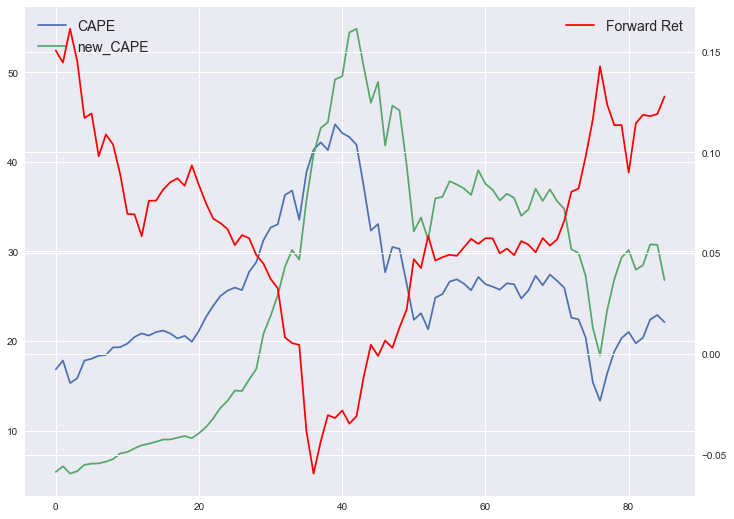

In [37]:
'''plot old CAPE, new CAPE, and forward 10-year return'''
plt.figure(figsize = [12, 9])
plt.plot(CAPE[['CAPE','new_CAPE']], label = ['CAPE', 'new_CAPE'])
plt.legend(loc = 'upper left', fontsize = 14)
plt.twinx()
plt.plot(CAPE['Ret'], c = 'r', label = 'Forward Ret')
plt.legend(fontsize = 14)
plt.show()